In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
data=pd.read_csv('C:/Data Sets/wine.csv')
data.head()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93


In [5]:
data.shape

(178, 13)

In [6]:
data.columns

Index(['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280_OD315', 'Proline'],
      dtype='object')

In [7]:
X,y=data.iloc[:,1:],data.iloc[:,0]

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [66]:
acc=[]
for i in range(1,16):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    acc.append(model.score(X_test,y_test))

In [67]:
acc

[0.8888888888888888,
 0.8611111111111112,
 0.8333333333333334,
 0.8611111111111112,
 0.8888888888888888,
 0.8611111111111112,
 0.8888888888888888,
 0.8333333333333334,
 0.8611111111111112,
 0.8611111111111112,
 0.8611111111111112,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.8611111111111112]

In [68]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

In [69]:
error_rate

[0.1111111111111111,
 0.1388888888888889,
 0.16666666666666666,
 0.1388888888888889,
 0.1111111111111111,
 0.1388888888888889,
 0.1111111111111111,
 0.16666666666666666,
 0.1388888888888889,
 0.1388888888888889,
 0.1388888888888889,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.1388888888888889,
 0.16666666666666666,
 0.16666666666666666,
 0.1388888888888889,
 0.1388888888888889,
 0.1388888888888889,
 0.1388888888888889,
 0.16666666666666666,
 0.1388888888888889,
 0.19444444444444445,
 0.19444444444444445,
 0.19444444444444445,
 0.19444444444444445,
 0.16666666666666666,
 0.2222222222222222,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25]

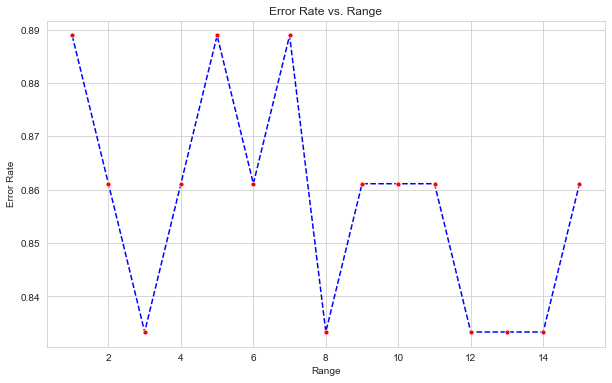

In [73]:
plt.figure(figsize=(10,6))
sns.lineplot(x=range(1,16), y=acc, marker='o', linestyle='dashed', color='blue', markersize=5, markerfacecolor='red')
plt.title('Error Rate vs. Range')
plt.xlabel('Range')
plt.ylabel('Error Rate')
plt.show()

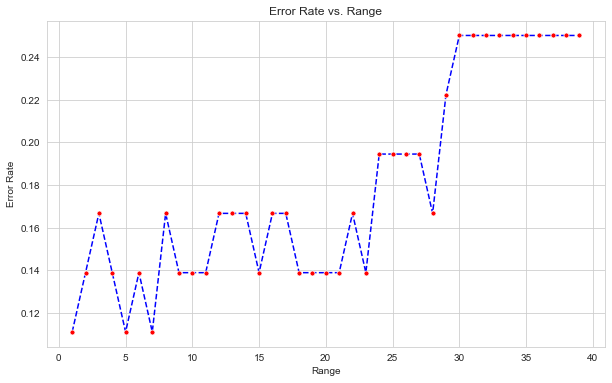

In [75]:
plt.figure(figsize=(10,6))
sns.lineplot(x=range(1,40), y=error_rate, marker='o', linestyle='dashed', color='blue', markersize=5, markerfacecolor='red')
plt.title('Error Rate vs. Range')
plt.xlabel('Range')
plt.ylabel('Error Rate')
plt.show()

In [77]:
model=KNeighborsClassifier(n_neighbors=1)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [78]:
model.score(X_test,y_test)

0.8888888888888888

In [79]:
y_pred=model.predict(X_test)

In [80]:
accuracy_score(y_test,y_pred)

0.8888888888888888

In [81]:
print(confusion_matrix(y_test,y_pred))

[[12  2  0]
 [ 0 15  1]
 [ 0  1  5]]
